## System: Rating classification system (Hệ thống phân loại độ tuổi theo anime)
<details>
  <summary><h3 style="color: #EFD1B4;" id="table_content">Mục lục</h3></summary>
  
  - Giới thiệu
  - Cài đặt các thư viện
  - Đọc dữ liệu từ file
  - Tiền xử lí dữ liệu
  - Xử lí văn bản
  - Chuẩn hóa các cột phân loại
  - Xử lý dữ liệu bất cân bằng
  - Xây dựng mô hình
  - Suy nghĩ và đánh giá
  - Tài liệu tham khảo
</details>

<h2 style="color: #EFD1B4;" id="introduction">Giới thiệu</h2>

Việc xây dựng hệ thống phân loại độ tuổi cho anime (Rating Classification System) là rất cần thiết để bảo vệ người xem và đảm bảo sự phù hợp của nội dung với từng nhóm tuổi. Anime có sự đa dạng về thể loại và chủ đề, từ những câu chuyện nhẹ nhàng dành cho trẻ em đến các tác phẩm có nội dung bạo lực, nhạy cảm hoặc chứa yếu tố tâm lý phức tạp. Hệ thống phân loại sẽ giúp người xem, đặc biệt là trẻ em, tránh tiếp cận những nội dung không phù hợp, đồng thời hỗ trợ phụ huynh kiểm soát tốt hơn việc tiêu thụ nội dung của con em mình. Ngoài ra, hệ thống này cũng giúp ngành công nghiệp anime tuân thủ các quy định pháp luật và đạo đức trong việc phát hành và quảng bá nội dung. Hơn nữa, việc phân loại rõ ràng còn giúp các nhà sản xuất định vị đúng đối tượng khán giả mục tiêu, từ đó tối ưu hóa chiến lược tiếp thị và tăng hiệu quả phân phối.

Trong hệ thống này, anime được đánh giá dựa trên nhiều yếu tố nội dung như Tóm tắt nội dung (Synopsis), Thể loại (Genres), Loại hình (Type), Studio sản xuất (Studios), Nguồn gốc (Source), Độ phổ biến (Popularity), Yêu thích (Favorites), Số lượng người đánh giá (Scored By), và Thành viên (Members).

Hệ thống phân loại độ tuổi cho anime bao gồm các danh mục sau:
- G - Mọi lứa tuổi: Chỉ định rằng anime phù hợp cho người xem ở mọi độ tuổi.
- PG - Trẻ em: Anime với phân loại này được thiết kế cho trẻ em, dù có thể chứa một số cảnh gây hồi hộp nhẹ, bạo lực hoạt hình hoặc chủ đề phù - hợp với khán giả nhỏ tuổi.
- PG-13 - Thanh thiếu niên từ 13 tuổi trở lên: Phân loại này dành cho anime phù hợp với người xem từ 13 tuổi trở lên.
- R - 17+ (bạo lực & ngôn từ thô tục): Anime được phân loại R thường chứa nội dung dành riêng cho khán giả trưởng thành.
- R+ - Cảnh khỏa thân nhẹ: Anime được phân loại R+ bao gồm nội dung có cảnh khỏa thân nhẹ hoặc chủ đề tình dục nhưng không quá rõ ràng.
- Rx - Hentai: Rx là mức phân loại cao nhất, chỉ định rằng anime chứa nội dung người lớn rõ ràng, chẳng hạn như khiêu dâm hoặc các chủ đề tình dục trực tiếp.

---

<h2 style="color: #EFD1B4;" id="libraries_importing">Cài đặt các thư viện</h2>

---

Trong hệ thống phân loại độ tuổi cho anime, các thư viện được sử dụng để xử lý và phân tích dữ liệu, huấn luyện mô hình học máy, và đánh giá kết quả phân loại. Để chuyển đổi dữ liệu văn bản thành dạng có thể sử dụng trong học máy, `TfidfVectorizer` từ `sklearn.feature_extraction.text` được sử dụng để tính toán trọng số TF-IDF cho các từ trong mô tả anime. `MultiLabelBinarizer` giúp chuyển đổi các nhãn phân loại đa nhãn thành dạng nhị phân, trong khi `LabelEncoder` mã hóa các nhãn văn bản thành các giá trị số để mô hình học máy có thể hiểu được. Các công cụ trong `sklearn.preprocessing` hỗ trợ chuẩn hóa và xử lý dữ liệu, đảm bảo dữ liệu đầu vào phù hợp với yêu cầu của các mô hình.

Để chia dữ liệu thành các tập huấn luyện và kiểm tra, `train_test_split từ sklearn.model_selection` được sử dụng, giúp đánh giá hiệu suất của mô hình. Để huấn luyện mô hình phân loại, `ExtraTreesClassifier` từ `sklearn.ensemble` là một thuật toán học máy mạnh mẽ, thường được sử dụng cho các bài toán phân loại. Để xử lý các vấn đề mất cân bằng lớp, `SMOTEENN` từ `imblearn.combine` kết hợp hai phương pháp SMOTE và ENN giúp cải thiện chất lượng mô hình. Cuối cùng, `sklearn.metrics` cung cấp các công cụ để đánh giá hiệu suất của mô hình, như độ chính xác, R2, ma trận nhầm lẫn và báo cáo phân loại.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
from sklearn.metrics import r2_score, confusion_matrix, classification_report

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesClassifier
from imblearn.combine import SMOTEENN

from PATHS import HOME, DATASET_PATH, ANIME_DATASET_2023, DATA_PREPROCESSING

Kiểm tra các đường dẫn đến các files và thư mục

In [2]:
print('HOME', HOME)
print('DATASET FOLDER', DATASET_PATH)
print('ANIME DATASET 2023', ANIME_DATASET_2023)
print('DATA PREPROCESSING', DATA_PREPROCESSING)

HOME d:\Data Science Programming\Project
DATASET FOLDER d:\Data Science Programming\Project\raw_animes_dataset
ANIME DATASET 2023 d:\Data Science Programming\Project\raw_animes_dataset\anime-dataset-2023.csv
DATA PREPROCESSING d:\Data Science Programming\Project\Data Preprocessing


Để tiền xử lý văn bản, thực hiện tải xuống các bộ dữ liệu NLTK cần thiết cho việc xử lý văn bản (các cột "Synopsis, Genres, Studios").

In [3]:
nltk.download('stopwords')  # Downloads a list of common stopwords (e.g., "the", "is") that are often removed in text preprocessing
nltk.download('wordnet')  # Downloads the WordNet corpus, which is used for lemmatization
nltk.download('punkt')  # Downloads the Punkt tokenizer models used for tokenizing text into words or sentences

# Initialize the WordNet lemmatizer, which will be used to reduce words to their base form (e.g., "running" -> "run")
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to C:\Users\MINH
[nltk_data]     HUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\MINH
[nltk_data]     HUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MINH
[nltk_data]     HUNG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Bây giờ, tải dữ liệu từ file 'anime-data-preprocessing.csv'.

Trong trường hợp không thể tải được, hãy kiểm tra lại đường dẫn đến file này.

In [4]:
anime_clean_df = pd.read_csv(os.path.join(DATA_PREPROCESSING, 'anime-data-preprocessing.csv'))
anime_clean_df

,Name,Score,Genres,Synopsis,Type,Episodes,Producers,Studios,Source,Time per ep (Min),Rating,Rank,Popularity,Favorites,Scored By,Members,Released date,Completed date
0,Fullmetal Alchemist: Brotherhood,9.10,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,64.0,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Bones,Manga,24.00,R - 17+ (violence & profanity),1,3,217606,2020030,3176556,2009-04-05,2010-07-04
1,Steins;Gate,9.07,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,24.0,"Frontier Works, Media Factory, Kadokawa Shoten...",White Fox,Visual novel,24.00,PG-13 - Teens 13 or older,2,13,182964,1336233,2440369,2011-04-06,2011-09-14
2,Bleach: Sennen Kessen-hen,9.07,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,13.0,"TV Tokyo, Aniplex, Dentsu, Shueisha",Pierrot,Manga,24.00,R - 17+ (violence & profanity),3,464,17999,213872,445198,2022-10-11,2022-12-27
3,Gintama°,9.06,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,51.0,"TV Tokyo, Aniplex, Dentsu",Bandai Namco Pictures,Manga,24.00,PG-13 - Teens 13 or older,4,331,15947,237957,595767,2015-04-08,2016-03-30
4,Shingeki no Kyojin Season 3 Part 2,9.05,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,10.0,"Production I.G, Dentsu, Mainichi Broadcasting ...",Wit Studio,Manga,23.00,R - 17+ (violence & profanity),5,24,55245,1471825,2104016,2019-04-29,2019-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13829,Kokuhaku,2.30,Horror,"Beside a certain building, a girl appears to m...",ONA,1.0,UNKNOWN,UNKNOWN,Original,0.67,R - 17+ (violence & profanity),13830,7105,17,4904,6697,2015-08-27,2015-08-27
13830,Hametsu no Mars,2.22,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,1.0,"Idea Factory, King Records, Design Factory",WAO World,Visual novel,19.00,R - 17+ (violence & profanity),13831,2512,295,47630,65622,2005-07-06,2005-07-06
13831,Tsui no Sora,2.22,Hentai,"After the sudden death of a student, mysteriou...",OVA,1.0,Obtain Future,UNKNOWN,Visual novel,23.00,Rx - Hentai,13832,7563,24,3436,5713,2002-08-10,2002-08-10
13832,Utsu Musume Sayuri,1.98,"Avant Garde, Comedy",Sayuri is a curious creature who lives on her ...,OVA,1.0,UNKNOWN,UNKNOWN,Original,3.00,R+ - Mild Nudity,13833,4492,50,15873,20789,2003-01-01,2003-01-01


Tập dữ liệu có 13834 dòng và 18 cột, nhưng để chắc chắn, sử dụng phương thức `.shape` để kiểm tra

In [5]:
anime_clean_df.shape

(13834, 18)

Kiểm tra thông tin của tập dữ liệu bằng phương thức `.info()`

In [6]:
anime_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               13834 non-null  object 
 1   Score              13834 non-null  float64
 2   Genres             13834 non-null  object 
 3   Synopsis           13834 non-null  object 
 4   Type               13834 non-null  object 
 5   Episodes           13834 non-null  float64
 6   Producers          13834 non-null  object 
 7   Studios            13834 non-null  object 
 8   Source             13834 non-null  object 
 9   Time per ep (Min)  13834 non-null  float64
 10  Rating             13834 non-null  object 
 11  Rank               13834 non-null  int64  
 12  Popularity         13834 non-null  int64  
 13  Favorites          13834 non-null  int64  
 14  Scored By          13834 non-null  int64  
 15  Members            13834 non-null  int64  
 16  Released date      138

- Tất cả các cột đều có 13834 giá trị không null, điều này giống với số lượng dòng, vì vậy không có giá trị trống hoặc NaN.
- Nhóm đối tượng bao gồm các cột: <span style="color: pink;">Name, Genres, Synopsis, Type, Producers, Studios, Source, Rating, Released date, Completed date</span>.
- Nhóm số gồm các cột: <span style="color: pink;">Score, Episodes, Time per ep (Min), Rank, Popularity, Favorites, Scored By, Member</span>.

In [7]:
anime_clean_df.describe()

,Score,Episodes,Time per ep (Min),Rank,Popularity,Favorites,Scored By,Members
count,13834.000000,13834.000000,13834.000000,13834.000000,13834.000000,13834.000000,1.383400e+04,1.383400e+04
mean,6.450098,11.893668,26.627488,6917.500000,7520.569177,773.679774,3.381713e+04,6.571856e+04
std,0.926846,46.403213,25.478353,3993.676147,4620.368066,5818.029723,1.240178e+05,2.058437e+05
min,1.850000,1.000000,0.100000,1.000000,1.000000,0.000000,1.000000e+02,1.800000e+02
25%,5.830000,1.000000,10.000000,3459.250000,3544.250000,2.000000,5.282500e+02,1.644250e+03
50%,6.470000,2.000000,24.000000,6917.500000,7289.000000,10.000000,2.339500e+03,6.300000e+03
75%,7.130000,12.000000,27.000000,10375.750000,11212.750000,81.000000,1.432375e+04,3.460975e+04
max,9.100000,3057.000000,168.000000,13834.000000,19191.000000,217606.000000,2.660903e+06,3.744541e+06


Thực hiện một phân tích ngắn gọn về từng cột trong bộ dữ liệu:

- Score:
    - Điểm trung bình là 6.45 với độ lệch chuẩn là 0.93, cho thấy phần lớn các điểm số của anime khá gần nhau.
    - Điểm thấp nhất là 1.85 và điểm cao nhất là 9.1, cho thấy một phạm vi rộng, nhưng phần lớn các điểm số nằm trong khoảng từ 5 đến 7.
- Episodes:
    - Số tập trung bình là khoảng 11.89, nhưng có sự biến thiên lớn với độ lệch chuẩn là 46.4, có thể do một số anime có số tập cực kỳ cao (hơn 3000).
    - Số tập thấp nhất là 1 và số tập cao nhất là 3057, với nhiều anime chỉ có 1 hoặc 2 tập.
- Time per ep (Min):
    - Thời gian trung bình mỗi tập là 26.6 phút. Tuy nhiên, có sự phân bố rộng với độ lệch chuẩn là 25.48 phút, cho thấy một số tập rất dài hoặc rất ngắn.
    - Tập ngắn nhất chỉ có 0.1 phút (có thể là một anime rất ngắn), và tập dài nhất là 168 phút (một tập cực kỳ dài).
- Rank:
    - Xếp hạng trung bình là 6917, với xếp hạng thấp nhất là 1 và xếp hạng cao nhất là 13834. Điều này cho thấy không phải tất cả anime đều có mức độ phổ biến giống nhau.
- Popularity:
    - Mức độ phổ biến trung bình là 7520, với độ lệch chuẩn là 4620. Một số anime cực kỳ phổ biến (lên đến 19191), trong khi một số khác có mức độ phổ biến thấp hơn rất nhiều.
- Favorites:
    - Số lượng yêu thích trung bình là 773, nhưng có sự biến thiên đáng kể (độ lệch chuẩn là 5818), với một số anime có hàng trăm nghìn lượt yêu thích (lên đến 217606).
- Scored By:
    - Số lượng đánh giá trung bình là 33,817. Dữ liệu có sự phân bố lớn (độ lệch chuẩn là 124,018), có nghĩa là một số anime có hàng triệu đánh giá, trong khi những anime khác có ít đánh giá hơn.
- Members:
    - Số lượng thành viên trung bình là 65,718, với sự biến thiên lớn (độ lệch chuẩn là 205,843). Một số anime có hàng triệu thành viên, trong khi một số khác chỉ có vài nghìn thành viên.

<h2 style="color: #EFD1B4;" id="feature_engineering">Tiền xử lí dữ liệu</h2>

Mặc dù file dữ liệu không có giá trị trống hoặc NaN, nhưng nó có thể chứa các giá trị không xác định như UNKNOWN hoặc Unknown, vì vậy chúng ta cần xử lý các giá trị này.

---

Kiểm tra các giá trị riêng biệt trong cột <span style="color: pink">Rating</span>

In [8]:
unique_rating_values = anime_clean_df['Rating'].unique()
print('The rating columns has unique values: \n', unique_rating_values)
print('The rating columns has', len(unique_rating_values), 'unique values')

The rating columns has unique values: 
 ['R - 17+ (violence & profanity)' 'PG-13 - Teens 13 or older'
 'R+ - Mild Nudity' 'PG - Children' 'G - All Ages' 'Rx - Hentai']
The rating columns has 6 unique values


Cột <span style="color: pink">Rating</span> có 6 giá trị riêng biệt và không chứa giá trị `UNKNOWN` hay `Unknown`

---

Vì chúng ta đang làm việc với các thuộc tính <span style="color: pink;">Synopsis, Genres, Type, Studios, Source, Popularity, Favorites, Scored By, Members</span>, nên chúng ta nên loại bỏ những thuộc tính không cần thiết khác trong bộ dữ liệu để tập trung vào các thuộc tính quan trọng.

In [9]:
anime_clean_df.drop(columns=['Name', 'Score', 'Episodes', 'Producers', 'Time per ep (Min)', 'Rank', 'Released date', 'Completed date'], inplace=True)
anime_clean_df.keys()

Index(['Genres', 'Synopsis', 'Type', 'Studios', 'Source', 'Rating',
       'Popularity', 'Favorites', 'Scored By', 'Members'],
      dtype='object')

Bây giờ, chúng ta nên kiểm tra các giá trị UNKNOWN và Unknown trong các cột <span style="color: pink">Studios, Sources</span> và xử lý chúng.

In [10]:
unknown_studios_count = anime_clean_df[anime_clean_df['Studios']=='UNKNOWN'].shape[0]
unknown_studios_ratio = unknown_studios_count/anime_clean_df.shape[0] * 100

print('Unknown studios ratio is: ', unknown_studios_ratio)

Unknown studios ratio is:  16.95099031371982


Tỷ lệ studios có giá trị UNKNOWN là khoảng `~16.9%`. Do đó, chúng ta nên loại bỏ các hàng có giá trị UNKNOWN trong cột Studios

In [11]:
anime_clean_df = anime_clean_df[anime_clean_df['Studios'] != 'UNKNOWN']
anime_clean_df

,Genres,Synopsis,Type,Studios,Source,Rating,Popularity,Favorites,Scored By,Members
0,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,Bones,Manga,R - 17+ (violence & profanity),3,217606,2020030,3176556
1,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,White Fox,Visual novel,PG-13 - Teens 13 or older,13,182964,1336233,2440369
2,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,Pierrot,Manga,R - 17+ (violence & profanity),464,17999,213872,445198
3,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,331,15947,237957,595767
4,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,Wit Studio,Manga,R - 17+ (violence & profanity),24,55245,1471825,2104016
...,...,...,...,...,...,...,...,...,...,...
13818,"Action, Sci-Fi","Based on a 1980 manga by Mikuriya Satomi, this...",OVA,Filmlink International,Manga,PG-13 - Teens 13 or older,8299,13,2475,4570
13822,"Action, Sci-Fi","After being hit by a truck in the year 2014, A...",TV,Visual Flight,Manga,PG-13 - Teens 13 or older,2234,294,41926,79139
13827,"Action, Comedy, Ecchi",Computer-animated gag shorts about two female ...,OVA,Production I.G,Original,R+ - Mild Nudity,6927,40,4633,7176
13830,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,WAO World,Visual novel,R - 17+ (violence & profanity),2512,295,47630,65622


In [12]:
anime_clean_df.shape

(11489, 10)

Bây giờ, tập dữ liệu có 11489 dòng và 10 cột

---

In [13]:
unknown_source_count = anime_clean_df[anime_clean_df['Source']=='Unknown'].shape[0]
unknown_source_ratio = unknown_source_count/anime_clean_df.shape[0] * 100

print('Unknown source ratio is: ', unknown_source_ratio)

Unknown source ratio is:  8.068587344416398


Tỷ lệ source có giá trị UNKNOWN là khoảng `~8.06%`. Do đó, chúng ta nên loại bỏ các hàng có giá trị UNKNOWN trong cột Source

In [14]:
anime_clean_df = anime_clean_df[anime_clean_df['Source'] != 'Unknown']
anime_clean_df

,Genres,Synopsis,Type,Studios,Source,Rating,Popularity,Favorites,Scored By,Members
0,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,Bones,Manga,R - 17+ (violence & profanity),3,217606,2020030,3176556
1,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,White Fox,Visual novel,PG-13 - Teens 13 or older,13,182964,1336233,2440369
2,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,Pierrot,Manga,R - 17+ (violence & profanity),464,17999,213872,445198
3,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,331,15947,237957,595767
4,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,Wit Studio,Manga,R - 17+ (violence & profanity),24,55245,1471825,2104016
...,...,...,...,...,...,...,...,...,...,...
13818,"Action, Sci-Fi","Based on a 1980 manga by Mikuriya Satomi, this...",OVA,Filmlink International,Manga,PG-13 - Teens 13 or older,8299,13,2475,4570
13822,"Action, Sci-Fi","After being hit by a truck in the year 2014, A...",TV,Visual Flight,Manga,PG-13 - Teens 13 or older,2234,294,41926,79139
13827,"Action, Comedy, Ecchi",Computer-animated gag shorts about two female ...,OVA,Production I.G,Original,R+ - Mild Nudity,6927,40,4633,7176
13830,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,WAO World,Visual novel,R - 17+ (violence & profanity),2512,295,47630,65622


In [15]:
anime_clean_df.shape

(10562, 10)

Bây giờ, tập dữ liệu có 10562 dòng và 10 cột

---

<h2 style="color: #EFD1B4;" id="text_processing">Xử lí văn bản</h2>

Các cột văn bản bao gồm:

- <span style="color: pink">Synopsis</span>: là mô tả ngắn gọn về cốt truyện chính của mỗi anime, cung cấp cho người dùng cái nhìn tổng quan về câu chuyện, các nhân vật, và bối cảnh mà không cần phải xem toàn bộ loạt phim. Nó làm nổi bật những chủ đề chính và những yếu tố đặc trưng của anime.

- <span style="color: pink">Genres</span>: là các thể loại chính để phân loại từng anime, như hành động, lãng mạn, khoa học viễn tưởng, giả tưởng, hài hước và nhiều thể loại khác. Các thể loại này giúp người dùng dễ dàng tìm kiếm anime theo sở thích và khám phá các anime phổ biến hoặc những thể loại đặc biệt.

---

In ra một số dòng của cột <span style="color: pink">Synopsis</span>

In [16]:
anime_clean_df['Synopsis'].sample(10, random_state=5)

580      Now that Kumiko Oumae has enrolled in Kitauji ...
1116     This two-part OVA is a series of shorts in rel...
10896    The Bakumatsu was an era in which the souls of...
2925     Joe Shimamura and his companions may seem like...
10064             No description available for this anime.
111      Having spent Christmas camping with her new fr...
11798    Adolpho has his heart set on a life of service...
12563    A young girl starting to put on make-up inadve...
9660     Recap episodes of Magia Record: Mahou Shoujo M...
8854     Sora was lying in front of a hospital. He was ...
Name: Synopsis, dtype: object

Mặc dù các cột không có giá trị trống hay NaN, nhưng chúng có thể chứa các giá trị không hợp lệ như `No description available for this anime`.

In [17]:
anime_clean_df[anime_clean_df['Synopsis'] == 'No description available for this anime.']

,Genres,Synopsis,Type,Studios,Source,Rating,Popularity,Favorites,Scored By,Members
923,"Comedy, Slice of Life",No description available for this anime.,Special,Shaft,4-koma manga,PG-13 - Teens 13 or older,5179,10,7278,14601
956,Comedy,No description available for this anime.,Movie,GoHands,4-koma manga,R - 17+ (violence & profanity),3813,49,8149,30035
1438,"Comedy, Romance",No description available for this anime.,OVA,feel.,Light novel,PG-13 - Teens 13 or older,2005,489,10462,94326
1476,Hentai,No description available for this anime.,OVA,T-Rex,Manga,Rx - Hentai,7212,75,2929,6456
1623,"Drama, Fantasy, Slice of Life",No description available for this anime.,Movie,Studio Gokumi,Light novel,PG-13 - Teens 13 or older,5182,11,5270,14555
...,...,...,...,...,...,...,...,...,...,...
13037,Hentai,No description available for this anime.,OVA,Studio Jam,Visual novel,Rx - Hentai,12692,0,247,981
13062,Comedy,No description available for this anime.,Music,Toei Animation,Picture book,PG - Children,15367,1,211,450
13239,Hentai,No description available for this anime.,OVA,Image House,Visual novel,Rx - Hentai,13395,0,202,797
13283,"Supernatural, Hentai",No description available for this anime.,OVA,Studio 9 Maiami,Visual novel,Rx - Hentai,9118,2,1096,3379


Vì trong dataset có 283 dòng chứa giá trị `No description available for this anime.`, chúng ta có thể loại bỏ những dòng này để đảm bảo dữ liệu sạch và không bị nhiễu

In [18]:
filtering = anime_clean_df[anime_clean_df['Synopsis'] == "No description available for this anime."]
anime_clean_df.drop(filtering.index,inplace=True)
anime_clean_df.reset_index(drop=True, inplace=True)
anime_clean_df

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_10484\345881173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_clean_df.drop(filtering.index,inplace=True)


,Genres,Synopsis,Type,Studios,Source,Rating,Popularity,Favorites,Scored By,Members
0,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,Bones,Manga,R - 17+ (violence & profanity),3,217606,2020030,3176556
1,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,White Fox,Visual novel,PG-13 - Teens 13 or older,13,182964,1336233,2440369
2,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,Pierrot,Manga,R - 17+ (violence & profanity),464,17999,213872,445198
3,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,331,15947,237957,595767
4,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,Wit Studio,Manga,R - 17+ (violence & profanity),24,55245,1471825,2104016
...,...,...,...,...,...,...,...,...,...,...
10274,"Action, Sci-Fi","Based on a 1980 manga by Mikuriya Satomi, this...",OVA,Filmlink International,Manga,PG-13 - Teens 13 or older,8299,13,2475,4570
10275,"Action, Sci-Fi","After being hit by a truck in the year 2014, A...",TV,Visual Flight,Manga,PG-13 - Teens 13 or older,2234,294,41926,79139
10276,"Action, Comedy, Ecchi",Computer-animated gag shorts about two female ...,OVA,Production I.G,Original,R+ - Mild Nudity,6927,40,4633,7176
10277,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,WAO World,Visual novel,R - 17+ (violence & profanity),2512,295,47630,65622


In [19]:
anime_clean_df.shape

(10279, 10)

Sau khi loại bỏ các dòng nhiễu, tập dữ liệu gồm 10279 dòng và 10 cột

---

Bây giờ, chúng ta sẽ loại bỏ dấu câu và ký tự đặc biệt khỏi cột <span style="color: pink">Synopsis</span>. Loại bỏ tất cả các ký tự không phải chữ cái và số (\w) cũng như ký tự khoảng trắng (\s) bằng cách sử dụng biểu thức chính quy (r'[^\w\s]')

In [20]:
# Extract values in 'Synopsis' columm into synopsis_value_df
synopsis_value_df = pd.DataFrame(anime_clean_df['Synopsis'])
synopsis_value_df['Synopsis'] = synopsis_value_df['Synopsis'].str.replace(r'[^\w\s]', "")
synopsis_value_df

,Synopsis
0,After a horrific alchemy experiment goes wrong...
1,Eccentric scientist Rintarou Okabe has a never...
2,Substitute Soul Reaper Ichigo Kurosaki spends ...
3,"Gintoki, Shinpachi, and Kagura return as the f..."
4,Seeking to restore humanity's diminishing hope...
...,...
10274,"Based on a 1980 manga by Mikuriya Satomi, this..."
10275,"After being hit by a truck in the year 2014, A..."
10276,Computer-animated gag shorts about two female ...
10277,Several months after a probe returning from Ma...


Tiếp theo, token hóa văn bản trong cột <span style="color: pink">Synopsis</span>, tức là tách văn bản thành các từ riêng biệt.

Ví dụ:

Trước khi thực hiện: "The hero wins the battle."

Sau khi thực hiện: ['The', 'hero', 'wins', 'the', 'battle', '.']

In [21]:
synopsis_value_df['Synopsis'] = synopsis_value_df['Synopsis'].apply(word_tokenize)
synopsis_value_df['Synopsis']

0        [After, a, horrific, alchemy, experiment, goes...
1        [Eccentric, scientist, Rintarou, Okabe, has, a...
2        [Substitute, Soul, Reaper, Ichigo, Kurosaki, s...
3        [Gintoki, ,, Shinpachi, ,, and, Kagura, return...
4        [Seeking, to, restore, humanity, 's, diminishi...
                               ...                        
10274    [Based, on, a, 1980, manga, by, Mikuriya, Sato...
10275    [After, being, hit, by, a, truck, in, the, yea...
10276    [Computer-animated, gag, shorts, about, two, f...
10277    [Several, months, after, a, probe, returning, ...
10278    [When, a, mysterious, entity, suddenly, appear...
Name: Synopsis, Length: 10279, dtype: object

Bây giờ, mỗi mục trong cột `Synopsis` sẽ được chuyển từ một chuỗi duy nhất thành một danh sách các từ (token)

---

- Loại bỏ stopwords: Dùng thư viện NLTK để loại bỏ các từ thường gặp trong tiếng Anh như "the", "is", "in", "on",... vì chúng không mang nhiều ý nghĩa trong phân tích văn bản.

- Chuyển tất cả các từ thành chữ thường: Giúp chuẩn hóa các từ, vì không phân biệt chữ hoa và chữ thường trong văn bản.

- Loại bỏ dấu câu: Sử dụng string.punctuation để loại bỏ các dấu câu không cần thiết, giúp văn bản sạch sẽ hơn.

- Áp dụng lemmatization: Làm chuẩn hóa các từ về dạng cơ bản của chúng (ví dụ: "running" -> "run", "better" -> "good"), giúp giảm số lượng từ khác nhau mà vẫn giữ được ý nghĩa chính.

- Loại bỏ các từ có độ dài bằng hoặc nhỏ hơn 1: Giúp loại bỏ những từ vô nghĩa hoặc không đủ ý nghĩa.

In [22]:
# Uses the NLTK library to get a list of common English stopwords (e.g., "the", "is", "in", "on") that usually don't carry significant meaning for text analysis.
eng_stopwords = stopwords.words('english') 

# Remove stopwords and convert all words to lowercase:
synopsis_value_df['Synopsis'] = synopsis_value_df['Synopsis'].dropna().apply(lambda words: [word.lower() for word in words if word.lower() not in eng_stopwords])

# Remove punctuation:
synopsis_value_df['Synopsis'] = synopsis_value_df['Synopsis'].apply(lambda x: [word.strip(string.punctuation) for word in x])

# Apply lemmatization:
synopsis_value_df['Synopsis'] = synopsis_value_df['Synopsis'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Remove words with length 1 or less:
synopsis_value_df['Synopsis'] = synopsis_value_df['Synopsis'].apply(lambda x: [word for word in x if len(word) > 1])
synopsis_value_df['Synopsis']

0        [horrific, alchemy, experiment, go, wrong, elr...
1        [eccentric, scientist, rintarou, okabe, never-...
2        [substitute, soul, reaper, ichigo, kurosaki, s...
3        [gintoki, shinpachi, kagura, return, fun-lovin...
4        [seeking, restore, humanity, diminishing, hope...
                               ...                        
10274    [based, 1980, manga, mikuriya, satomi, adaptat...
10275    [hit, truck, year, 2014, akira, natsume, awake...
10276    [computer-animated, gag, short, two, female, a...
10277    [several, month, probe, returning, mar, burn, ...
10278    [mysterious, entity, suddenly, appears, center...
Name: Synopsis, Length: 10279, dtype: object

Kiểm tra số lần xuất hiện của mỗi từ trong cột `Synopsis`

In [23]:
synopsis_value_df['Synopsis'].explode().value_counts()[:30]

Synopsis
source     3788
one        3271
world      3042
school     2912
girl       2827
life       2773
new        2379
however    2293
friend     2186
find       1967
day        1902
year       1819
time       1608
two        1563
student    1547
ann        1448
take       1426
high       1346
young      1317
power      1278
first      1267
story      1258
human      1249
must       1193
way        1174
love       1160
make       1146
begin      1144
get        1141
episode    1139
Name: count, dtype: int64

Vì mô hình chỉ làm việc với các cột số, sử dụng TfidfVectorizer để chuyển các mô tả anime (cột Synopsis) thành các vector số, giúp mô hình có thể hiểu và phân tích chúng. Nó loại bỏ các từ không quan trọng, chỉ giữ lại 500 từ (hoặc n-gram) quan trọng nhất, và kết hợp các unigram, bigram, và trigram để cải thiện chất lượng của các đặc trưng văn bản.

In [24]:
tfidfvectorsizer = TfidfVectorizer(max_features=500,stop_words='english',ngram_range=(1,3))
word_array = tfidfvectorsizer.fit_transform(anime_clean_df['Synopsis'])
print(word_array.toarray()[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.19312941 0.
 0.         0.         0.42099179 0.         0.19441996 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.21996144 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Bây giờ, chúng ta chuyển ma trận TF-IDF thành một Pandas DataFrame, trong đó:

- Mỗi hàng đại diện cho một anime.
- Mỗi cột đại diện cho một từ hoặc n-gram.
- Các giá trị trong ô thể hiện điểm số TF-IDF, đại diện cho tầm quan trọng của mỗi từ/n-gram trong bối cảnh mô tả anime cụ thể.

In [25]:
tfidf_values = pd.DataFrame(word_array.toarray(), columns=tfidfvectorsizer.get_feature_names_out())
print(tfidf_values)

       abilities  ability      able  academy  accident    action  actually  \
0            0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
1            0.0      0.0  0.172385      0.0   0.00000  0.000000       0.0   
2            0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
3            0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
4            0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
...          ...      ...       ...      ...       ...       ...       ...   
10274        0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
10275        0.0      0.0  0.000000      0.0   0.15757  0.159509       0.0   
10276        0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
10277        0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   
10278        0.0      0.0  0.000000      0.0   0.00000  0.000000       0.0   

       adventure  adventures  age  ...    works     world     y

Bây giờ, chúng ta sẽ nối DataFrame gốc (<span style="color: pink">anime_clean_df</span>) với các giá trị TF-IDF (<span style="color: pink">tfidf_values</span>) theo chiều cột, qua đó thêm các đặc trưng TF-IDF vào dữ liệu anime gốc, để cả đặc trưng văn bản và dữ liệu metadata đều được bao gồm trong DataFrame cuối cùng.

In [26]:
anime_clean_df = pd.concat([anime_clean_df.reset_index(),tfidf_values],axis=1)
anime_clean_df

,index,Genres,Synopsis,Type,Studios,Source,Rating,Popularity,Favorites,Scored By,...,works,world,year,year old,years,years ago,years later,young,young girl,younger
0,0,"Action, Adventure, Drama, Fantasy",After a horrific alchemy experiment goes wrong...,TV,Bones,Manga,R - 17+ (violence & profanity),3,217606,2020030,...,0.00000,0.112296,0.00000,0.0,0.141547,0.0,0.0,0.000000,0.0,0.0
1,1,"Drama, Sci-Fi, Suspense",Eccentric scientist Rintarou Okabe has a never...,TV,White Fox,Visual novel,PG-13 - Teens 13 or older,13,182964,1336233,...,0.20618,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,2,"Action, Adventure, Fantasy",Substitute Soul Reaper Ichigo Kurosaki spends ...,TV,Pierrot,Manga,R - 17+ (violence & profanity),464,17999,213872,...,0.00000,0.142401,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,3,"Action, Comedy, Sci-Fi","Gintoki, Shinpachi, and Kagura return as the f...",TV,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,331,15947,237957,...,0.00000,0.101282,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,4,"Action, Drama",Seeking to restore humanity's diminishing hope...,TV,Wit Studio,Manga,R - 17+ (violence & profanity),24,55245,1471825,...,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,10274,"Action, Sci-Fi","Based on a 1980 manga by Mikuriya Satomi, this...",OVA,Filmlink International,Manga,PG-13 - Teens 13 or older,8299,13,2475,...,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
10275,10275,"Action, Sci-Fi","After being hit by a truck in the year 2014, A...",TV,Visual Flight,Manga,PG-13 - Teens 13 or older,2234,294,41926,...,0.00000,0.000000,0.20232,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
10276,10276,"Action, Comedy, Ecchi",Computer-animated gag shorts about two female ...,OVA,Production I.G,Original,R+ - Mild Nudity,6927,40,4633,...,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
10277,10277,"Horror, Sci-Fi",Several months after a probe returning from Ma...,OVA,WAO World,Visual novel,R - 17+ (violence & profanity),2512,295,47630,...,0.00000,0.090841,0.00000,0.0,0.000000,0.0,0.0,0.109556,0.0,0.0


In [27]:
anime_clean_df.shape

(10279, 511)

Bây giờ, DataFrame có 10279 dòng và 511 cột (gồm các cột từ khóa).

---

Bây giờ, chúng ta nên bỏ cột <span style="color: pink">Synopsis</span> vì chúng ta đã có các cột từ khóa đại diện cho <span style="color: pink">Synopsis</span>.

In [28]:
anime_clean_df.drop(['Synopsis'],axis=1,inplace=True)

Kiểm tra số lượng của từng studio trong cột <span style="color: pink">Studios</span>.

In [29]:
studios_count=anime_clean_df["Studios"].value_counts()
studios_count

Studios
Toei Animation                   515
Sunrise                          389
J.C.Staff                        327
Madhouse                         296
Studio Deen                      250
                                ... 
KOO-KI                             1
Moss Design Unit                   1
Filmlink International, Bebow      1
GAV Video                          1
Mippei Eigeki Kiryuukan            1
Name: count, Length: 1228, dtype: int64

- Danh sách cho thấy có 1.228 studio độc đáo, với nhiều studio chỉ sản xuất một vài tựa anime, như các mục như KOO-KI, Moss Design Unit và GAV Video, mỗi studio chỉ có 1 tựa anime.

- Phân phối này chỉ ra rằng, mặc dù một số studio rất năng suất, nhưng một số khác lại có lịch sử sản xuất hạn chế hơn.

<h2 style="color: #EFD1B4;" id="converting_categorical_variables">Chuẩn hóa các cột phân loại</h2>

Chúng ta sẽ chuyển cột <span style="color: pink">Genres</span> thành một danh sách các thể loại để có thể phân loại nhị phân (one hot encode).

In [30]:
anime_clean_df["Genres"]=anime_clean_df["Genres"].apply(lambda x:x.split(',') if pd.isna(x)!=True else "")

- Chuyển đổi dữ liệu thể loại đa nhãn (mỗi anime có thể có nhiều thể loại) thành định dạng ma trận nhị phân, trong đó mỗi thể loại được đại diện bởi một cột và mỗi anime sẽ nhận giá trị 1 hoặc 0 để chỉ ra sự xuất hiện của thể loại đó.
- Sử dụng `MultiLabelBinarizer`. Đây là công cụ trong scikit-learn dùng để chuyển đổi dữ liệu phân loại đa nhãn thành định dạng ma trận nhị phân

In [31]:
mlb = MultiLabelBinarizer()

anime_clean_df = pd.concat([anime_clean_df,pd.DataFrame(mlb.fit_transform(anime_clean_df["Genres"]),columns=mlb.classes_, index=anime_clean_df.index)],axis=1)

In [32]:
anime_clean_df

,index,Genres,Type,Studios,Source,Rating,Popularity,Favorites,Scored By,Members,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,0,"[Action, Adventure, Drama, Fantasy]",TV,Bones,Manga,R - 17+ (violence & profanity),3,217606,2020030,3176556,...,0,0,0,0,0,0,0,0,0,0
1,1,"[Drama, Sci-Fi, Suspense]",TV,White Fox,Visual novel,PG-13 - Teens 13 or older,13,182964,1336233,2440369,...,0,0,0,0,0,0,0,0,0,0
2,2,"[Action, Adventure, Fantasy]",TV,Pierrot,Manga,R - 17+ (violence & profanity),464,17999,213872,445198,...,0,0,0,0,0,0,0,0,0,0
3,3,"[Action, Comedy, Sci-Fi]",TV,Bandai Namco Pictures,Manga,PG-13 - Teens 13 or older,331,15947,237957,595767,...,0,0,0,0,0,0,0,0,0,0
4,4,"[Action, Drama]",TV,Wit Studio,Manga,R - 17+ (violence & profanity),24,55245,1471825,2104016,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,10274,"[Action, Sci-Fi]",OVA,Filmlink International,Manga,PG-13 - Teens 13 or older,8299,13,2475,4570,...,0,0,0,0,0,0,0,0,0,0
10275,10275,"[Action, Sci-Fi]",TV,Visual Flight,Manga,PG-13 - Teens 13 or older,2234,294,41926,79139,...,0,0,0,0,0,0,0,0,0,0
10276,10276,"[Action, Comedy, Ecchi]",OVA,Production I.G,Original,R+ - Mild Nudity,6927,40,4633,7176,...,0,0,0,0,0,0,0,0,0,0
10277,10277,"[Horror, Sci-Fi]",OVA,WAO World,Visual novel,R - 17+ (violence & profanity),2512,295,47630,65622,...,0,0,1,0,0,0,0,0,0,0


Tạo các cột nhị phân cho các trường <span style="color: pink">Type, Studio, Source</span>.

In [33]:
anime_clean_df = pd.get_dummies(anime_clean_df,columns = ['Type', 'Studios', 'Source'])
anime_clean_df

,index,Genres,Rating,Popularity,Favorites,Scored By,Members,abilities,ability,able,...,Source_Mixed media,Source_Music,Source_Novel,Source_Original,Source_Other,Source_Picture book,Source_Radio,Source_Visual novel,Source_Web manga,Source_Web novel
0,0,"[Action, Adventure, Drama, Fantasy]",R - 17+ (violence & profanity),3,217606,2020030,3176556,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
1,1,"[Drama, Sci-Fi, Suspense]",PG-13 - Teens 13 or older,13,182964,1336233,2440369,0.0,0.0,0.172385,...,False,False,False,False,False,False,False,True,False,False
2,2,"[Action, Adventure, Fantasy]",R - 17+ (violence & profanity),464,17999,213872,445198,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
3,3,"[Action, Comedy, Sci-Fi]",PG-13 - Teens 13 or older,331,15947,237957,595767,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
4,4,"[Action, Drama]",R - 17+ (violence & profanity),24,55245,1471825,2104016,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,10274,"[Action, Sci-Fi]",PG-13 - Teens 13 or older,8299,13,2475,4570,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
10275,10275,"[Action, Sci-Fi]",PG-13 - Teens 13 or older,2234,294,41926,79139,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,False,False,False
10276,10276,"[Action, Comedy, Ecchi]",R+ - Mild Nudity,6927,40,4633,7176,0.0,0.0,0.000000,...,False,False,False,True,False,False,False,False,False,False
10277,10277,"[Horror, Sci-Fi]",R - 17+ (violence & profanity),2512,295,47630,65622,0.0,0.0,0.000000,...,False,False,False,False,False,False,False,True,False,False


In [34]:
genres = pd.Series([x for item in anime_clean_df["Genres"] for x in item]).value_counts()
genres.head(20)

Action            3318
Comedy            2606
 Fantasy          2113
 Sci-Fi           1826
 Romance          1439
 Comedy           1272
 Adventure        1121
 Drama            1104
 Supernatural     1004
Adventure          921
Hentai             859
Drama              735
 Ecchi             656
 Slice of Life     628
 Mystery           548
Fantasy            399
Slice of Life      244
 Horror            242
Sports             229
 Sports            217
Name: count, dtype: int64

Thực hiện một loạt các phép biến đổi để tách riêng các thể loại cho mỗi anime, sau đó mã hóa nhị phân (one-hot encoding) các thể loại đó, và cuối cùng tổng hợp các giá trị đã mã hóa nhị phân lại thành một DataFrame cuối cùng, trong đó mỗi anime được biểu diễn bằng các cột nhị phân tương ứng với từng thể loại.

In [35]:
genres_exploded = anime_clean_df.explode('Genres')
genres_dummies = pd.get_dummies(genres_exploded['Genres'])
genres_final = pd.concat([genres_exploded['index'], genres_dummies], axis=1)
genres_final = genres_final.groupby('index').sum()

anime_clean_df = pd.concat([anime_clean_df, genres_final], axis=1)
anime_clean_df

,index,Genres,Rating,Popularity,Favorites,Scored By,Members,abilities,ability,able,...,Gourmet,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense
0,0,"[Action, Adventure, Drama, Fantasy]",R - 17+ (violence & profanity),3,217606,2020030,3176556,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,"[Drama, Sci-Fi, Suspense]",PG-13 - Teens 13 or older,13,182964,1336233,2440369,0.0,0.0,0.172385,...,0,0,0,0,0,0,0,0,0,0
2,2,"[Action, Adventure, Fantasy]",R - 17+ (violence & profanity),464,17999,213872,445198,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
3,3,"[Action, Comedy, Sci-Fi]",PG-13 - Teens 13 or older,331,15947,237957,595767,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,4,"[Action, Drama]",R - 17+ (violence & profanity),24,55245,1471825,2104016,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,10274,"[Action, Sci-Fi]",PG-13 - Teens 13 or older,8299,13,2475,4570,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
10275,10275,"[Action, Sci-Fi]",PG-13 - Teens 13 or older,2234,294,41926,79139,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
10276,10276,"[Action, Comedy, Ecchi]",R+ - Mild Nudity,6927,40,4633,7176,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0
10277,10277,"[Horror, Sci-Fi]",R - 17+ (violence & profanity),2512,295,47630,65622,0.0,0.0,0.000000,...,0,0,1,0,0,0,0,0,0,0


Chuẩn hóa các cột giá trị số để mô hình có hiệu suất tốt nhất

In [36]:
scaler = preprocessing.MinMaxScaler()
anime_clean_df[["Popularity"]] = scaler.fit_transform(anime_clean_df[["Popularity"]])
anime_clean_df[["Favorites"]] = scaler.fit_transform(anime_clean_df[["Favorites"]])
anime_clean_df[["Scored By"]] = scaler.fit_transform(anime_clean_df[["Scored By"]])
anime_clean_df[["Members"]] = scaler.fit_transform(anime_clean_df[["Members"]])

In [37]:
anime_clean_df.keys()

Index(['index', 'Genres', 'Rating', 'Popularity', 'Favorites', 'Scored By',
       'Members', 'abilities', 'ability', 'able',
       ...
       'Gourmet', 'Hentai', 'Horror', 'Mystery', 'Romance', 'Sci-Fi',
       'Slice of Life', 'Sports', 'Supernatural', 'Suspense'],
      dtype='object', length=1839)

Vì cột <span style="color: pink">Rating</span> chứa các giá trị dạng chuỗi, nên chúng ta sẽ chuyển đổi nó thành dạng số bằng cách sử dụng LabelEncoder.

In [38]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Rating' to numerical values
anime_clean_df['Rating_encoded'] = label_encoder.fit_transform(anime_clean_df['Rating'])

# Get the mapping of string labels to numeric values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Label Mapping:", label_mapping)

# Alternatively, you can directly access classes_ and transform methods:
print("Classes in order:", label_encoder.classes_)

Label Mapping: {'G - All Ages': np.int64(0), 'PG - Children': np.int64(1), 'PG-13 - Teens 13 or older': np.int64(2), 'R - 17+ (violence & profanity)': np.int64(3), 'R+ - Mild Nudity': np.int64(4), 'Rx - Hentai': np.int64(5)}
Classes in order: ['G - All Ages' 'PG - Children' 'PG-13 - Teens 13 or older'
 'R - 17+ (violence & profanity)' 'R+ - Mild Nudity' 'Rx - Hentai']


Sau khi mã hóa, bảng ánh xạ như sau:
- `G - All Ages`: 0 
- `PG - Children`: 1
- `PG-13 - Teens 13 or older`: 2
- `R - 17+ (violence & profanity)`: 3
- `R+ - Mild Nudity`: 4
- `Rx - Hentai`: 5

Loại bỏ các thuộc tính không liên quan

In [39]:
X = anime_clean_df.drop(["index","Genres","Rating"],axis=1)
y = anime_clean_df["Rating_encoded"]

Bây giờ, chúng ta chia bộ dữ liệu thành các tập huấn luyện và kiểm tra, đảm bảo rằng phân phối của biến mục tiêu được duy trì. Điều này cũng giúp đảm bảo tính tái sản xuất bằng cách thiết lập random_state và cung cấp tính linh hoạt để điều chỉnh tỷ lệ phần trăm dữ liệu được sử dụng cho huấn luyện và kiểm tra với train_size và test_size.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1, stratify=y)

Kiểm tra phân phối của từng loại nhãn trong tập huấn luyện và kiểm tra

In [41]:
# Verify the distribution in both train and test sets
print("Distribution in y_train:", y_train.value_counts(normalize=True))
print("Distribution in y_test:", y_test.value_counts(normalize=True))

Distribution in y_train: Rating_encoded
2    0.535372
0    0.119805
3    0.109104
5    0.104656
4    0.079361
1    0.051703
Name: proportion, dtype: float64
Distribution in y_test: Rating_encoded
2    0.535344
0    0.119974
3    0.108949
5    0.104410
4    0.079442
1    0.051881
Name: proportion, dtype: float64


Để dễ hiểu sự phân phối của các nhãn trong tập dữ liệu, tiến hành trực quan hóa nó

In [42]:
def visualize(y):

    counts = []
    labels = []

    unique_quality = np.sort(np.unique(y))
    for quality in unique_quality:
        labels.append(quality)

        quality_count = (y==quality).sum()
        counts.append(quality_count)

    colors = plt.cm.get_cmap('tab10', len(unique_quality))

    # Plot the data
    bars = plt.bar(labels, counts, color=colors(range(len(unique_quality))))
    plt.title("Distribution of anime's rating")
    plt.ylabel('Count')
    for bar, count in zip(bars, counts):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height + 0.05,  # Position above the bar
                 str(count), ha='center', va='bottom', fontsize=10)
    plt.show()

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_10484\1477781030.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_quality))


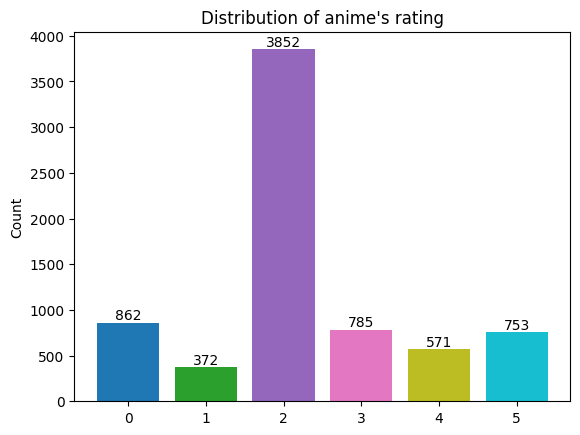

In [43]:
visualize(y_train.values)

Chúng ta có thể thấy rằng xếp hạng của anime là mất cân bằng, xếp hạng PG-13 - Teens 13 or older rất cao (~3852), trong khi các xếp hạng khác rất thấp (~900).

Điều này sẽ khiến hiệu suất của mô hình không tốt hoặc bị overfitting, vì vậy chúng ta cần xử lý dữ liệu mất cân bằng này.

<h2 style="color: #EFD1B4;" id="imbalanced_data_handling">Xử lý dữ liệu bất cân bằng</h2>

Chúng ta sử dụng SMOTEENN để xử lý dữ liệu mất cân bằng:

- SMOTEENN (Synthetic Minority Over-sampling Technique + Edited Nearest Neighbors) là một kỹ thuật được sử dụng để xử lý dữ liệu mất cân bằng trong các tác vụ phân loại. Nó kết hợp hai phương pháp: SMOTE (Synthetic Minority Over-sampling Technique) và ENN (Edited Nearest Neighbors), giúp cải thiện hiệu suất mô hình khi có sự mất cân bằng đáng kể giữa các lớp.
- SMOTE (Synthetic Minority Over-sampling Technique): là một phương pháp để tăng cường lớp thiểu số trong một bộ dữ liệu mất cân bằng. Kỹ thuật này tạo ra các mẫu tổng hợp mới từ các điểm dữ liệu của lớp thiểu số hiện có bằng cách nội suy giữa các hàng xóm gần nhất.
- ENN (Edited Nearest Neighbors): ENN là một phương pháp để lọc và loại bỏ dữ liệu nhiễu khỏi bộ dữ liệu huấn luyện. Cụ thể, ENN kiểm tra các hàng xóm gần nhất của mỗi điểm dữ liệu, và nếu điểm đó bị phân loại sai bởi phần lớn các hàng xóm của nó, nó sẽ bị loại bỏ khỏi bộ dữ liệu

In [44]:
# Kiểm tra phân bố các lớp ban đầu
print("Before SMOTEENN:")
print(y_train.value_counts())

Before SMOTEENN:
Rating_encoded
2    3852
0     862
3     785
5     753
4     571
1     372
Name: count, dtype: int64


Áp dụng thuật toán SMOTEENN cho tập dữ liệu

In [45]:
smote_enn = SMOTEENN(random_state=42, sampling_strategy = 'not majority')
X_smoteenn, y_smoteenn = smote_enn.fit_resample(X_train, y_train)

y_smoteenn_df = pd.DataFrame(y_smoteenn, columns=['Rating_encoded'])
X_smoteenn_df = pd.DataFrame(X_smoteenn, columns=X_train.keys())

Bây giờ, chúng ta sẽ trực quan hóa sự phân bố của các nhãn sau khi áp dụng SMOTEENN

C:\Users\MINH HUNG\AppData\Local\Temp\ipykernel_10484\1477781030.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_quality))


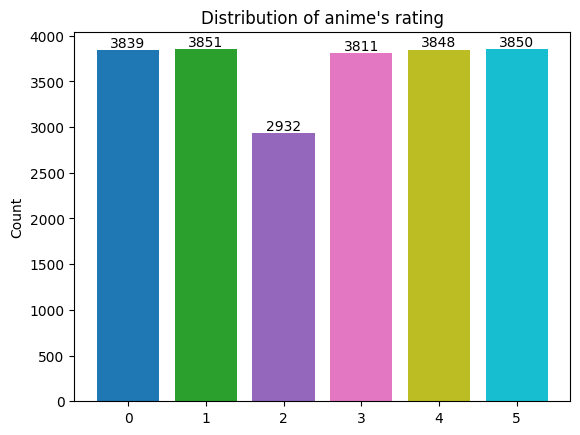

In [46]:
visualize(y_smoteenn_df.values)

In [47]:
X_clean_train, y_clean_train = X_smoteenn_df, y_smoteenn_df

In [48]:
X_clean_train

,Popularity,Favorites,Scored By,Members,abilities,ability,able,academy,accident,action,...,Hentai,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,Rating_encoded
0,0.692079,0.000000,0.000053,0.000171,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.158885,0.000473,0.009263,0.012121,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.581605,0.000005,0.000104,0.000400,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.539865,0.000014,0.000204,0.000542,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
4,0.684211,0.000005,0.000122,0.000181,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22126,0.370717,0.000111,0.000916,0.001776,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,5
22127,0.285863,0.000373,0.001930,0.003405,0.0,0.0,0.000000,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,5
22128,0.345312,0.000040,0.001058,0.002090,0.0,0.0,0.014572,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,5
22129,0.548816,0.000007,0.000233,0.000558,0.0,0.0,0.000000,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,5


<h2 style="color: #EFD1B4;" id="build_models">Xây dựng mô hình</h2>

Sử dụng mô hình `ExtraTreesClassifier` cho việc phân loại. Mô hình `ExtraTreesClassifier` là một trong những thuật toán đặc biệt hữu ích trong các bài toán phân loại. Với nguyên lý hoạt động dựa trên việc kết hợp nhiều cây quyết định (ensemble learning), Extra Trees xây dựng các cây với cách phân chia ngẫu nhiên thay vì tối ưu hóa cho mỗi node như trong Random Forest. Điều này giúp mô hình tránh được việc overfitting và cải thiện tính tổng quát. Hơn nữa, Extra Trees còn nổi bật với khả năng huấn luyện và dự đoán nhanh, đặc biệt là khi làm việc với các bộ dữ liệu lớn. Mô hình này không yêu cầu quá nhiều bước điều chỉnh siêu tham số, giúp giảm thiểu thời gian và công sức khi triển khai.

In [49]:
model = ExtraTreesClassifier()
model.fit(X_clean_train, y_clean_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)

c:\Users\MINH HUNG\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error: 0.12159533073929961


ETC Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       370
           1       0.87      0.52      0.65       160
           2       0.91      0.96      0.93      1651
           3       0.78      0.80      0.79       336
           4       0.89      0.74      0.81       245
           5       1.00      1.00      1.00       322

    accuracy                           0.90      3084
   macro avg       0.90      0.82      0.85      3084
weighted avg       0.90      0.90      0.90      3084



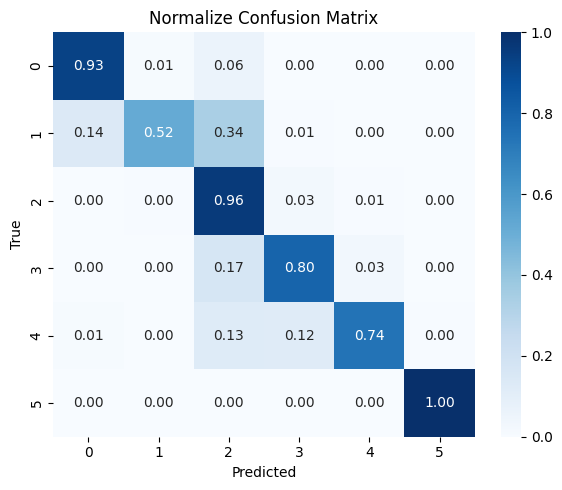

In [50]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Classification Report
class_report = classification_report(y_test, y_pred)
print(f"ETC Classification Report:\n{class_report}")

# Plot Confusion Matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1, 2, 3, 4, 5], yticklabels=[0, 1, 2, 3, 4, 5])
plt.title("Normalize Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

In [51]:
r2 = r2_score(y_pred,y_test)
print(r2)

0.9007454767016198


In [52]:
for i in range(20):
    print('Predicted: {:.2f};\n     Real: {};\n'.format(y_pred[i], y_test.iloc[i]))

Predicted: 5.00;
     Real: 5;

Predicted: 0.00;
     Real: 0;

Predicted: 2.00;
     Real: 2;

Predicted: 0.00;
     Real: 0;

Predicted: 0.00;
     Real: 0;

Predicted: 2.00;
     Real: 2;

Predicted: 2.00;
     Real: 2;

Predicted: 5.00;
     Real: 5;

Predicted: 2.00;
     Real: 2;

Predicted: 2.00;
     Real: 2;

Predicted: 2.00;
     Real: 2;

Predicted: 2.00;
     Real: 2;

Predicted: 4.00;
     Real: 4;

Predicted: 2.00;
     Real: 2;

Predicted: 2.00;
     Real: 2;

Predicted: 0.00;
     Real: 0;

Predicted: 5.00;
     Real: 5;

Predicted: 2.00;
     Real: 2;

Predicted: 5.00;
     Real: 5;

Predicted: 2.00;
     Real: 2;



<h2 style="color: #EFD1B4">Suy nghĩ và đánh giá</h2>

---

**Khó khăn**
- Phải xử lý văn bản cho thuộc tính Genres đồng thời dữ liệu bị mất cân bằng khá nặng nên phải xử lý để đảm bảo hiệu quả cho mô hình

**Kiến thức học được**
- Học được cách xử lý các thuộc tính dạng văn bản để mô hình sử dụng
- Học được cách sử dụng thư viện nltk
- Học được cách xử lý dữ liệu mất cân bằng
- Học được cách đọc biểu đồ ma trận confusion

**Nếu có thêm thời gian**
- Xử lý các cột thuộc tính dạng văn bản chuẩn hơn
- Sử dụng thêm các mô hình khác để tiến hành phân tích so sánh

---

<h2 style="color: #EFD1B4">Tài liệu tham khảo</h2>

---

1. [Trích chọn thuộc tính trong đoạn văn bản với TF-IDF](https://viblo.asia/p/trich-chon-thuoc-tinh-trong-doan-van-ban-voi-tf-idf-Az45bAOqlxY) - Viblo.
2. [How to store a TfidfVectorizer for future use in scikit-learn?](https://www.geeksforgeeks.org/how-to-store-a-tfidfvectorizer-for-future-use-in-scikit-learn/) - GeeksforGeeks.
3. [Understanding TF-IDF (Term Frequency-Inverse Document Frequency)](https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/) - GeeksforGeeks.
4. [Tiền xử lí dữ liệu văn bản với NLTK](https://viblo.asia/p/tien-xu-li-du-lieu-van-ban-voi-nltk-Az45b0LgZxY) - Viblo.
5. [Introduction to NLTK: Tokenization, Stemming, Lemmatization, POS Tagging](https://www.geeksforgeeks.org/introduction-to-nltk-tokenization-stemming-lemmatization-pos-tagging/) - GeeksforGeeks.
6. [NLTK :: Natural Language Toolkit](https://www.nltk.org/) - nltk.
7. [SMOTEENN](https://imbalanced-learn.org/stable/references/generated/imblearn.combine.SMOTEENN.html) - Imbalanced learn.
8. [Imbalanced Classification in Python: SMOTE-ENN Method](https://towardsdatascience.com/imbalanced-classification-in-python-smote-enn-method-db5db06b8d50) - Raden Aurelius Andhika Viadinugroho.
9. [ExtraTreesClassifier](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) - Scikit learn.
9. [ML | Extra Tree Classifier for Feature Selection](https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/) - GeeksforGeeks.

